<a href="https://colab.research.google.com/github/biplobsd/clef2022/blob/main/clef2022_task3_fake_news_detection_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLef 2022 -  CheckThat!** DIU_SpeedOut
Task 3 - Experiment -
Fake News Detection
<br>
LSTM (Word2vec using gensim library)
<br><br>


Read More : https://sites.google.com/view/clef2022-checkthat/tasks/task-3-fake-news-detection?authuser=0
<br>
Repo: https://github.com/biplobsd/clef2022
<br>
Source: https://www.kaggle.com/preatcher/spam-classification-lstm-word2vec-98


In [ ]:
# Dataset is Restricted for shearing 
# Access Request https://zenodo.org/record/6508748
# !gdown 
# !gdown 

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("combine.csv")
df.head()

,public_id,text,title,our rating
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",FALSE
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,partially false
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,partially false
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,FALSE
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,FALSE


In [ ]:
df_test = pd.read_csv("English_data_test_release_with_rating.csv")
df.head()

,public_id,text,title,our rating
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",FALSE
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,partially false
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,partially false
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,FALSE
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,FALSE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   public_id   1264 non-null   object
 1   text        1264 non-null   object
 2   title       1241 non-null   object
 3   our rating  1264 non-null   object
dtypes: object(4)
memory usage: 39.6+ KB


In [ ]:
df['our rating'].value_counts()

FALSE              465
partially false    358
TRUE               142
other              117
false              113
true                69
Name: our rating, dtype: int64

In [ ]:
df = df.rename(columns={'our rating':'Category'})
df_test = df_test.rename(columns={'our rating':'Category'})

In [ ]:
df['Category'] = df.Category.map({'TRUE': 1,'true':1, 'FALSE': 0,'false':0, 'partially false': 2, 'other': 3})

In [ ]:
df_test['Category'] = df_test.Category.map({'True': 1, 'FALSE': 0,'false':0, 'Partially false': 2, 'Other': 3})

In [ ]:
df

,public_id,text,title,Category
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",0
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,2
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,2
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,0
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,0
...,...,...,...,...
1259,47423bb6,More than four million calls to the taxman are...,Taxman fails to answer four million calls a ye...,1
1260,097c142a,More under-18s are being taken to court for se...,Police catch 11‑year‑olds being used to sell d...,1
1261,08bc59f4,The Government’s much vaunted Help to Buy Isa ...,"Help to Buy Isa scandal: 500,000 first-time bu...",0
1262,af3393ce,The late Robin Williams once called cocaine “G...,A coke-snorting generation of hypocrites,1


In [ ]:
# category to list binary 
def pp(data):
  p = []
  for i,v in enumerate(data):
    if v==1:
      p.append([1, 0, 0, 0])
    elif v==0:
      p.append([0, 1, 0, 0])
    elif v==2:
      p.append([0, 0, 1, 0])
    if v==3:
      p.append([0, 0, 0, 1])
  return p

df['cat'] = pp(df['Category'])


In [ ]:
df_test['cat'] = pp(df_test['Category'])

In [ ]:
df

,public_id,text,title,Category,cat
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",0,"[0, 1, 0, 0]"
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,2,"[0, 0, 1, 0]"
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,2,"[0, 0, 1, 0]"
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,0,"[0, 1, 0, 0]"
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,0,"[0, 1, 0, 0]"
...,...,...,...,...,...
1259,47423bb6,More than four million calls to the taxman are...,Taxman fails to answer four million calls a ye...,1,"[1, 0, 0, 0]"
1260,097c142a,More under-18s are being taken to court for se...,Police catch 11‑year‑olds being used to sell d...,1,"[1, 0, 0, 0]"
1261,08bc59f4,The Government’s much vaunted Help to Buy Isa ...,"Help to Buy Isa scandal: 500,000 first-time bu...",0,"[0, 1, 0, 0]"
1262,af3393ce,The late Robin Williams once called cocaine “G...,A coke-snorting generation of hypocrites,1,"[1, 0, 0, 0]"


In [ ]:
df['Category'].value_counts()

0    578
2    358
1    211
3    117
Name: Category, dtype: int64

In [ ]:
df['CategoryName'] = df.Category.map({0: 'False',1:'True', 2:'partially false', 3: 'other'})

In [ ]:
# df = df.rename(columns={'Category': 'Our rating'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


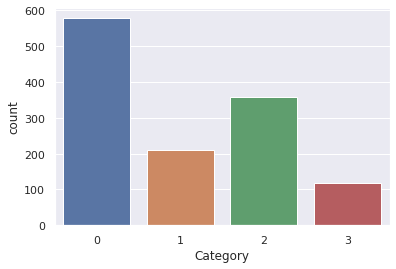

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.Category)
plt.show()

In [ ]:
df.isna().sum(axis=0)

public_id        0
text             0
title           23
Category         0
cat              0
CategoryName     0
dtype: int64

In [ ]:
df.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1259    0
1260    0
1261    0
1262    0
1263    0
Length: 1264, dtype: int64

In [ ]:
import math
df['title'] = df['title'].replace(math.nan,' ')
df_test['title'] = df_test['title'].replace(math.nan,' ')

In [ ]:
df['fullmsg'] = df['title'] + ' ' + df['text']
df_test['fullmsg'] = df_test['title'] + ' ' + df_test['text']

In [ ]:
df['fullmsg'].head(20)

0     You Can Be Fined $1,500 If Your Passenger Is U...
1     Missouri lawmakers condemn Las Vegas shooting ...
2     CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...
3     Obama’s Daughters Caught on Camera Burning US ...
4     Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
5     K A B O O M! Governor and Secretary of State i...
6     FDA Shocking Study: Cells Used In Vaccines Con...
7     Israel Hits Beirut with Nuclear Missile, Trump...
8     Obama’s Daughters Caught on Camera Burning US ...
9     Fields of human cages discovered in Caruthers ...
10    4 challenges await Panetta at DOD One cannot t...
11    Did China Steal Coronavirus From Canada And We...
12    Number of people in poverty in working familie...
13    U.S. Senator Tammy Baldwin of Wisconsin U.S. S...
14    Flu Vaccine Increases Coronavirus Risk 36% Say...
15    Kenny Rogers’ Wife Donates Half His Estate To ...
16    Kwik Trip Launches Kwik Strip Gentlemen’s Club...
17    Michigan Removed 177,000 Voters from Voter

In [ ]:
df_test['fullmsg'].head(20)

0     US Treasury deputy sec warns that shortages li...
1     CNN Praises Taliban For Wearing Masks During A...
2     Tennessee Has Just LEGALIZED Government COVID ...
3     MEDICAL SHOCKER: Scientists at Sloan Kettering...
4     Study Results: Facemasks are Ineffective to Bl...
5     How to Neutralize Potential Damage from mRNA V...
6     CDC Quietly Admits The Death Toll From COVID V...
7     EXCLUSIVE: Per the CDC There Are Nearly Twice ...
8     Fully vaccinated people have a 885% higher cha...
9     CDC confesses: Vaccines are failing, the vaxxe...
10    Census Data, CDC Database Expose Unvaccinated ...
11    National Security Alert: Act of War, Thousands...
12    Study Finds Predominance of Antibody-Resistant...
13    Vaccine Caused 13 Year Old's Heart To Stop Aft...
14    FDA ‘playing bait and switch’ with Americans, ...
15    New Study Shows 1 in 1000 Develop Heart Inflam...
16    55 Years After His Death, Walt Disney’s Frozen...
17    BREAKING – HUGE: Results of Canvassing in 

In [ ]:
df.isna().sum(axis=0)

public_id       0
text            0
title           0
Category        0
cat             0
CategoryName    0
fullmsg         0
dtype: int64

In [ ]:
df['word_length'] = df['fullmsg'].apply(lambda x:len(x.split()))

In [ ]:
df.shape

(1264, 8)

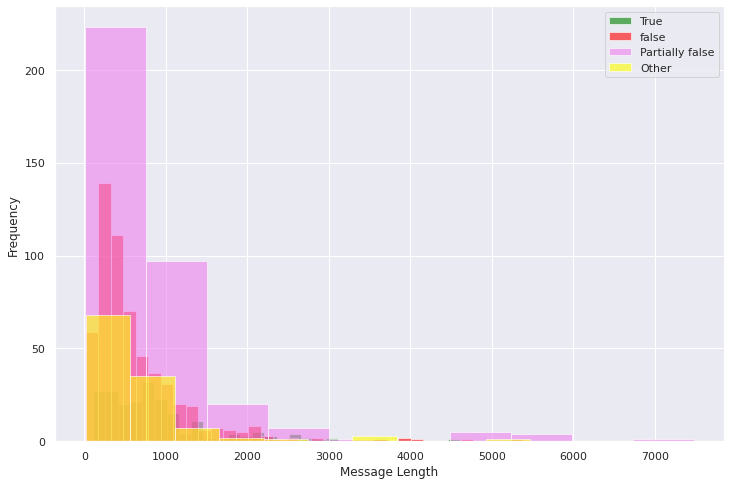

In [ ]:
plt.figure(figsize=(12, 8))


df[df.Category==1].word_length.plot(bins=35, kind='hist', color='green', 
                                       label='True', alpha=0.6)
df[df.Category==0].word_length.plot(bins=35, kind='hist', color='red', 
                                       label='false', alpha=0.6),
df[df.Category == 2].word_length.plot(kind='hist', color='violet', 
                                       label='Partially false', alpha=0.6),
                         
df[df.Category == 3].word_length.plot(kind='hist', color='yellow', 
                                       label='Other', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.show()

From here we can say that the longer text are more probable to become Spam msgs

now let do some text_preprocessing

In [ ]:
!pip install text-hammer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 40.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import text_hammer as th


In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
  
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 566 µs, sys: 10 µs, total: 576 µs
Wall time: 585 µs


In [ ]:
cleaned_df = text_preprocessing(df, "fullmsg")

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

In [ ]:
cleaned_df_test = text_preprocessing(df_test, "fullmsg")

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

In [ ]:
cleaned_df.fullmsg

0       fine 1500 passenger mobile phone starting week...
1       missouri lawmaker condemn las vegas shooting m...
2       cbc cut donald trumps home 2 cameo broadcast h...
3       obamas daughter catch camera burn flag dc prot...
4       leak visitor log reveal schiff 78 visit epstei...
                              ...                        
1259    taxman fail answer million call year mp warn p...
1260    police catch 11yearolds sell drug under18s tak...
1261    help buy isa scandal 500000 firsttime buyer te...
1262    cokesnorte generation hypocrite late robin wil...
1263    cokesnorte generation hypocrite late robin wil...
Name: fullmsg, Length: 1264, dtype: object

In [ ]:
cleaned_df_test.fullmsg

0      treasury deputy sec warn shortage likely conti...
1      cnn praise taliban wear mask attack kabulappro...
2      tennessee legalize government covid kidnapping...
3      medical shocker scientist sloan kettering disc...
4      study result facemask ineffective block transm...
                             ...                        
607    from october 20 covid pass vaccination abolish...
608    bill gates doctor say refuse vaccinate childre...
609    quebecs expansion covid19 vaccine passport liq...
610    alert luc montagnier vaccine kill people year ...
611    quebecs cannabis liquor store require coronavi...
Name: fullmsg, Length: 612, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.fullmsg:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)

[('say', 4530),
 ('year', 2702),
 ('people', 2645),
 ('state', 1985),
 ('new', 1927),
 ('not', 1868),
 ('health', 1652),
 ('work', 1554),
 ('time', 1533),
 ('government', 1482),
 ('report', 1432),
 ('change', 1376),
 ('national', 1289),
 ('service', 1192),
 ('president', 1155),
 ('climate', 1142),
 ('need', 1138),
 ('trump', 1124),
 ('school', 1111),
 ('include', 1097)]

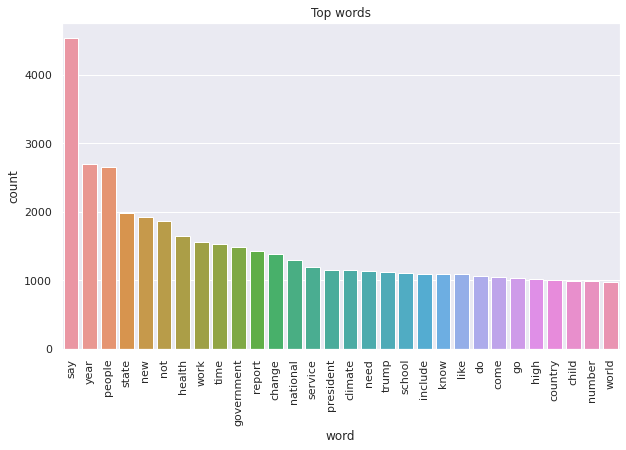

In [ ]:
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

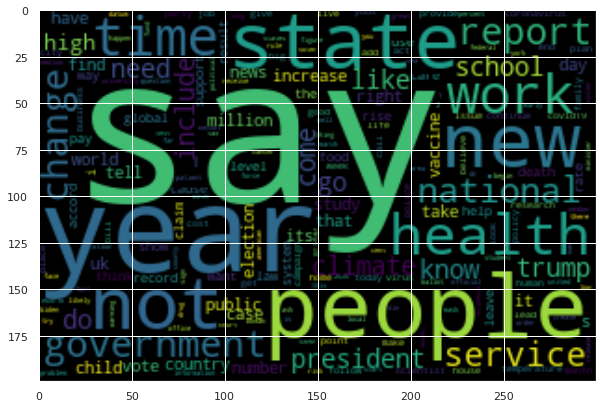

In [ ]:
### Creating wordcloud
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

In [ ]:
cleaned_df

,public_id,text,title,Category,cat,CategoryName,fullmsg,word_length
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",0,"[0, 1, 0, 0]",False,fine 1500 passenger mobile phone starting week...,236
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,2,"[0, 0, 1, 0]",partially false,missouri lawmaker condemn las vegas shooting m...,778
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,2,"[0, 0, 1, 0]",partially false,cbc cut donald trumps home 2 cameo broadcast h...,455
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,0,"[0, 1, 0, 0]",False,obamas daughter catch camera burn flag dc prot...,300
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,0,"[0, 1, 0, 0]",False,leak visitor log reveal schiff 78 visit epstei...,308
...,...,...,...,...,...,...,...,...
1259,47423bb6,More than four million calls to the taxman are...,Taxman fails to answer four million calls a ye...,1,"[1, 0, 0, 0]",True,taxman fail answer million call year mp warn p...,208
1260,097c142a,More under-18s are being taken to court for se...,Police catch 11‑year‑olds being used to sell d...,1,"[1, 0, 0, 0]",True,police catch 11yearolds sell drug under18s tak...,154
1261,08bc59f4,The Government’s much vaunted Help to Buy Isa ...,"Help to Buy Isa scandal: 500,000 first-time bu...",0,"[0, 1, 0, 0]",False,help buy isa scandal 500000 firsttime buyer te...,166
1262,af3393ce,The late Robin Williams once called cocaine “G...,A coke-snorting generation of hypocrites,1,"[1, 0, 0, 0]",True,cokesnorte generation hypocrite late robin wil...,130


In [ ]:
cleaned_df_test

,ID,text,title,Category,fullmsg,cat
0,122653045997905671927713471889615536378,The deputy secretary at the US Treasury has sa...,US Treasury deputy sec warns that shortages li...,2,treasury deputy sec warn shortage likely conti...,"[0, 0, 1, 0]"
1,275389285957305997321446227088442471741,KABUL—Approximately twelve minutes after U.S. ...,CNN Praises Taliban For Wearing Masks During A...,3,cnn praise taliban wear mask attack kabulappro...,"[0, 0, 0, 1]"
2,333248764296609831067233855420575814716,The vast majority of (oblivious) Americans hav...,Tennessee Has Just LEGALIZED Government COVID ...,0,tennessee legalize government covid kidnapping...,"[0, 1, 0, 0]"
3,264019763253447756851916399533799891538,(Natural News) There’s a secret layer of infor...,MEDICAL SHOCKER: Scientists at Sloan Kettering...,0,medical shocker scientist sloan kettering disc...,"[0, 1, 0, 0]"
4,158073737187690682830899773280916034317,"A recent study reported by the NCBI, which is ...",Study Results: Facemasks are Ineffective to Bl...,0,study result facemask ineffective block transm...,"[0, 1, 0, 0]"
...,...,...,...,...,...,...
607,206921579192720402152220292846254137866,DISTRIBUTE TO EVERYONE who does not want to be...,"‘From October 20, the Covid pass and vaccinati...",0,from october 20 covid pass vaccination abolish...,"[0, 1, 0, 0]"
608,26464356958085668535128110139955868781,The physician who served as Bill Gates’ privat...,Bill Gates' Former Doctor Says He 'Refused To ...,3,bill gates doctor say refuse vaccinate childre...,"[0, 0, 0, 1]"
609,189700315351432315169761694613833047445,"A customer leaves an SAQ outlet on Jan. 6, the...",Quebec’s expansion of COVID-19 vaccine passpor...,1,quebecs expansion covid19 vaccine passport liq...,"[1, 0, 0, 0]"
610,188373492569049166266633359075598402208,Vaccine coercion activists are using the fake ...,ALERT: Luc Montagnier Did NOT Say Vaccine Woul...,0,alert luc montagnier vaccine kill people year ...,"[0, 1, 0, 0]"


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test, y_train,y_test = train_test_split(cleaned_df.fullmsg, cleaned_df.cat, test_size = 0.2, stratify = cleaned_df.cat
#                                                  ,random_state = 42)

In [ ]:
# X_train,X_test, y_train,y_test = train_test_split(cleaned_df.fullmsg, cleaned_df.cat, test_size = 0.2, stratify = cleaned_df.cat)

In [ ]:
X_train,X_test,y_train,y_test = cleaned_df.fullmsg, cleaned_df_test.fullmsg, cleaned_df.cat, cleaned_df_test.cat

In [ ]:
X_train

0       You Can Be Fined $1,500 If Your Passenger Is U...
1       Missouri lawmakers condemn Las Vegas shooting ...
2       CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...
3       Obama’s Daughters Caught on Camera Burning US ...
4       Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
                              ...                        
1259    Taxman fails to answer four million calls a ye...
1260    Police catch 11‑year‑olds being used to sell d...
1261    Help to Buy Isa scandal: 500,000 first-time bu...
1262    A coke-snorting generation of hypocrites The l...
1263    A coke-snorting generation of hypocrites The l...
Name: fullmsg, Length: 1264, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer
num_words = 22000 # this means 15000 unique words can be taken 
tokenizer=Tokenizer(lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
mxl = cleaned_df.word_length.max()

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=mxl,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = mxl, padding = 'post')

In [ ]:
print(X_train_pad.shape,X_test_pad.shape) # this is our 2D matrix we can take this as Input data

(1264, 7481) (612, 7481)


In [ ]:
print(X_train_pad.shape,X_test_pad.shape) # this is our 2D matrix we can take this as Input data

(1264, 7481) (612, 7481)


Now lets design our Deep learning model to train our data
add Codeadd Markdown
Method1: by using solely embedding layers

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow as tf
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [ ]:
# Our vectorized labels
y_trainC = np.array([np.array(val) for val in y_train])
y_testC = np.array([np.array(val) for val in y_test])


In [ ]:
y_trainC, y_testC

(array([[0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        ...,
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0]]), array([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        ...,
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0]]))

Method 2: Using word2vec i'm gonna use gensim

In [ ]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') # this would download vector with 100 dimension

In [ ]:
glove_gensim['cat'].shape[0] # this is the diemnsion of the vectors

In [ ]:
# now lets connvert all the words we have in our data into vectors 
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.wv.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [ ]:
gensim_weight_matrix.shape

In [ ]:
# designing our architecture 
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model_gensim = Sequential()
model_gensim.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1], # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(50,return_sequences=False)))
model_gensim.add(Dense(4, activation = 'sigmoid'))
model_gensim.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [ ]:
model_gensim.summary()

In [ ]:
from keras.models import load_model
model_gensim = load_model('/content/drives/clef2020/model002_sigmoid4_a6l6_5.h5')

In [ ]:
history_gensim = model_gensim.fit(
    X_train_pad,
    y_trainC, 
    epochs = 25, 
    validation_data=(X_test_pad, y_testC),
    verbose = 1,)

Epoch 1/25
40/40 [==============================] - 101s 2s/step - loss: 0.6075 - accuracy: 0.4138 - val_loss: 0.5177 - val_accuracy: 0.4918
Epoch 2/25
40/40 [==============================] - 84s 2s/step - loss: 0.5077 - accuracy: 0.4652 - val_loss: 0.5403 - val_accuracy: 0.5065
Epoch 3/25
40/40 [==============================] - 83s 2s/step - loss: 0.5001 - accuracy: 0.4644 - val_loss: 0.5062 - val_accuracy: 0.5033
Epoch 4/25
40/40 [==============================] - 82s 2s/step - loss: 0.4923 - accuracy: 0.4873 - val_loss: 0.5603 - val_accuracy: 0.4592
Epoch 5/25
40/40 [==============================] - 83s 2s/step - loss: 0.4884 - accuracy: 0.4968 - val_loss: 0.5246 - val_accuracy: 0.4722
Epoch 6/25
40/40 [==============================] - 83s 2s/step - loss: 0.4771 - accuracy: 0.5024 - val_loss: 0.5333 - val_accuracy: 0.4363
Epoch 7/25
40/40 [==============================] - 83s 2s/step - loss: 0.4707 - accuracy: 0.5182 - val_loss: 0.5575 - val_accuracy: 0.4493
Epoch 8/25
40/40 [=

KeyboardInterrupt: ignored

In [ ]:
model_gensim.evaluate(X_test_pad,y_testC)

20/20 [==============================] - 13s 654ms/step - loss: 0.7482 - accuracy: 0.3922


[0.7481801509857178, 0.3921568691730499]

In [ ]:
y_preds  = model_gensim.predict(X_test_pad)

In [ ]:
y_testC

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
y_preds

array([[0.7103303 , 0.13551302, 0.08271288, 0.08979224],
       [0.01146153, 0.09512141, 0.8656527 , 0.11875333],
       [0.00898583, 0.9777479 , 0.01930284, 0.00477751],
       ...,
       [0.09353855, 0.71105313, 0.12843305, 0.0627996 ],
       [0.03085326, 0.9092897 , 0.0286755 , 0.03147684],
       [0.06605554, 0.04285717, 0.6124171 , 0.21269463]], dtype=float32)

In [ ]:
import re, string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import tree
from sklearn import linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import GridSearchCV
import xgboost
from collections import Counter

In [ ]:
#Function to create ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot([0,1],[0,1],color='darkblue',label='Guessing',linestyle='--')

    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.xlabel('False Positve Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under ROC curve')
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = (np.trace(cf) / float(np.sum(cf))) * 100

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f} %\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

              precision    recall  f1-score   support

           0       0.26      0.04      0.07       210
           1       0.54      0.67      0.60       315
           2       0.10      0.29      0.15        56
           3       0.09      0.10      0.10        31

    accuracy                           0.39       612
   macro avg       0.25      0.27      0.23       612
weighted avg       0.38      0.39      0.35       612




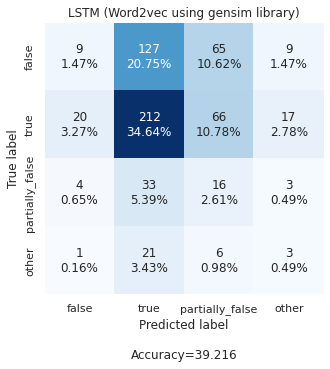

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,roc_curve
print(classification_report(y_testC.argmax(axis=1), y_preds.argmax(axis=1)))
cf_1 =confusion_matrix(y_testC.argmax(axis=1), y_preds.argmax(axis=1))
# print(cf_1)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['false','true', 'partially_false', 'other']
make_confusion_matrix(cf_1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='LSTM (Word2vec using gensim library)')

In [ ]:
model_gensim.save("/content/drives/clef2020/model002_sigmoid4_a6l6_5_final.h5")


# Submission

In [ ]:
df_raw = pd.read_csv("/content/drives/clef2020/task3-datasets/zenodo/v3/Task3_Test/English_data_test_release.csv")
clear_output()
df_raw['title'] = df_raw['title'].replace(math.nan,' ')
df_raw['fullmsg'] = df_raw['title'] + ' ' + df_raw['text']
cleaned_df_raw = text_preprocessing(df_raw, "fullmsg")

cleaned_df_raw['word_length'] = cleaned_df_raw['fullmsg'].apply(lambda x:len(x.split()))

X_ = tokenizer.texts_to_sequences(cleaned_df_raw.fullmsg)
X_pad=pad_sequences(X_,maxlen=mxl,padding='post')
df_raw = df_raw.drop(labels=['fullmsg', 'word_length'], axis=1)

In [ ]:
m = model_gensim.predict(X_pad)

In [ ]:
predict = []
label = ['true', 'false', 'partially false', 'other']
for p in m:
  predict.append(label[p.argmax()])
df_raw['predicted_rating'] = predict

In [ ]:
!rm -rf /content/subtask3_english_DIU_SpeedOut.zip /content/subtask3_english_DIU_SpeedOut.tsv
teamName = 'DIU_SpeedOut'
fileName = f'subtask3_english_{teamName}'
df_raw.to_csv(f'{fileName}.tsv', sep='\t', index=False)
fileNameZip = f'{fileName}.zip'
fileNameTsv = f'{fileName}.tsv'
!zip $fileNameZip $fileNameTsv